In [7]:
# Stock historical price
import requests
response = requests.get('https://api.stockdata.org/v1/data/eod?symbols=AAPL&api_token=jd0qoX9VUT5lMG5onfd3RBXzWEhXVKPwNz1Rheao')


In [8]:
import pandas as pd
js = response.json()
date = js.get('data')
stock_price = pd.DataFrame(columns = ['date', 'close_price'])
for i in date:
    stock_price_length = len(stock_price)
    stock_price.loc[stock_price_length] = [i['date'], i['close']]
stock_price

,date,close_price
0,2022-04-29T16:00:00.000000Z,157.65
1,2022-04-28T16:00:00.000000Z,163.64
2,2022-04-27T16:00:00.000000Z,156.57
3,2022-04-26T16:00:00.000000Z,156.80
4,2022-04-25T16:00:00.000000Z,162.88
...,...,...
247,2021-05-07T16:00:00.000000Z,130.21
248,2021-05-06T16:00:00.000000Z,129.74
249,2021-05-05T16:00:00.000000Z,128.10
250,2021-05-04T16:00:00.000000Z,127.85


In [9]:
import warnings
warnings.filterwarnings("ignore")
stock_price['date'] = stock_price['date'].str.replace('T16:00:00.000000Z', '')
stock_price = stock_price.sort_values(by=['date']).reset_index()
stock_price = stock_price.drop(['index'], axis = 1)
stock_price['pct_change'] = stock_price['close_price'].pct_change()
stock_price = stock_price.drop(0)

In [6]:
from pathlib import Path  
filepath = Path('DSCI510_final_project/data/Stock_Price.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
stock_price.to_csv(filepath)  

In [7]:
# 10 year treasuty rate
import requests
from bs4 import BeautifulSoup

In [8]:
is_link = 'https://ycharts.com/indicators/10_year_treasury_rate'
response = requests.get(is_link)
soup = BeautifulSoup(response.content, 'html.parser')

In [9]:
response_treasury = requests.get('https://data.nasdaq.com/api/v3/datasets/USTREASURY/YIELD.json?api_key=m4QDcyVZJxsukKV23FsE')


In [10]:
t_js = response_treasury.json()
t_data = t_js.get('dataset')['data']
t_price = pd.DataFrame(columns = ['date', 'close_price'])
for i in t_data:
    length = len(t_price)
    t_price.loc[length] = [i[0], i[10]]
t_price

,date,close_price
0,2022-02-04,1.93
1,2022-02-03,1.82
2,2022-02-02,1.78
3,2022-02-01,1.81
4,2022-01-31,1.79
...,...,...
8027,1990-01-08,8.02
8028,1990-01-05,7.99
8029,1990-01-04,7.98
8030,1990-01-03,7.99


In [11]:
t_price = t_price[t_price['date'] > "2020-02-20"]
t_price['pct_change'] = t_price['close_price'].pct_change()
t_price = t_price.drop(0)

In [12]:
t_price

,date,close_price,pct_change
1,2022-02-03,1.82,-0.056995
2,2022-02-02,1.78,-0.021978
3,2022-02-01,1.81,0.016854
4,2022-01-31,1.79,-0.011050
5,2022-01-28,1.78,-0.005587
...,...,...,...
487,2020-02-27,1.30,0.150442
488,2020-02-26,1.33,0.023077
489,2020-02-25,1.33,0.000000
490,2020-02-24,1.38,0.037594


In [13]:
filepath = Path('DSCI510_final_project/data/Treasury_Price.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
t_price.to_csv(filepath) 

In [14]:
#https://data.nasdaq.com/data/USTREASURY/YIELD-treasury-yield-curve-rates
#https://stackoverflow.com/questions/29928982/how-do-i-convert-dates-from-month-dd-yy-to-mm-dd-yy-in-python

In [2]:
# Company News
from urllib.request import urlopen
from urllib.request import Request
from bs4 import BeautifulSoup
finviz_url = 'https://finviz.com/quote.ashx?t=AAPL'
news_tables = {}
req = Request(url=finviz_url,headers={'user-agent': 'my-app/0.0.1'}) 
resp = urlopen(req)    
html = BeautifulSoup(resp, features="lxml")
news_table = html.find(id='news-table')
news_tables['AAPL'] = news_table

In [3]:
df = news_tables['AAPL']
df_tr = df.findAll('tr')
print ('\n')
print ('Recent News Headlines for {}: '.format('AAPL'))
for i, table_row in enumerate(df_tr):
    a_text = table_row.a.text
    td_text = table_row.td.text
    td_text = td_text.strip()
    print(a_text,'(',td_text,')')



Recent News Headlines for AAPL: 
Earnings Season Has Been Just One More Reason to Sell Stocks ( May-01-22 09:27PM )
Big Tech Cant Easily Fix the Stock Markets Woes This Time ( 09:26PM )
Spotify Stock Sell-Off: The Truth Behind the Headlines ( 08:55AM )
5G Stocks To Buy: How Next-Gen Cloud Will Create New Services ( 08:15AM )
Lockdowns and supply chain disruption to accelerate Apple's move away from China, with India a likely beneficiary, analysts say ( 05:30AM )
3 Deeply Discounted Stocks That Can Turn $300,000 Into $1 Million by 2030 ( 05:06AM )
Warren Buffett: We didn't repurchase any Berkshire stock in April ( Apr-30-22 11:03AM )
12 Safe Stocks To Buy For Beginner Investors ( 10:28AM )
Buy These 2 Streaming Video Stocks Instead of Netflix ( 08:25AM )
This Mid-Cap Stock Could Deliver Blockbuster Growth This Earnings Season ( 08:10AM )
How Much Of Apple Inc. (NASDAQ:AAPL) Do Institutions Own? ( 08:04AM )
Netflix's Video Game Plans Don't Make Any Sense ( 07:55AM )
Is Meta Platforms S

In [4]:
parsed_news = []
for file_name, news_table in news_tables.items():
    for x in news_table.findAll('tr'):
        text = x.a.get_text() 
        date_scrape = x.td.text.split()

        if len(date_scrape) == 1:
            time = date_scrape[0]
            
        else:
            date = date_scrape[0]
            time = date_scrape[1]

        ticker = file_name.split('_')[0]
        
        parsed_news.append([ticker, date, time, text])

In [9]:
from datetime import datetime
news = pd.DataFrame(parsed_news, columns = ['Stock', 'Date', 'Time', 'News Headlines'])
news['Date'] = pd.to_datetime(news['Date'], format='%b-%d-%y')

In [10]:
news

,Stock,Date,Time,News Headlines
0,AAPL,2022-05-01,09:27PM,Earnings Season Has Been Just One More Reason ...
1,AAPL,2022-05-01,09:26PM,Big Tech Cant Easily Fix the Stock Markets Woe...
2,AAPL,2022-05-01,08:55AM,Spotify Stock Sell-Off: The Truth Behind the H...
3,AAPL,2022-05-01,08:15AM,5G Stocks To Buy: How Next-Gen Cloud Will Crea...
4,AAPL,2022-05-01,05:30AM,Lockdowns and supply chain disruption to accel...
...,...,...,...,...
95,AAPL,2022-04-28,04:19PM,"US STOCKS-Wall Street ends sharply higher, lif..."
96,AAPL,2022-04-28,03:56PM,"Apple Could Fall From the Tree in Q3, Warns An..."
97,AAPL,2022-04-28,03:30PM,What Mark Zuckerberg Said That Calmed Investors
98,AAPL,2022-04-28,03:22PM,Stocks rally as investors shake off negative G...


### Stock Price

In [20]:
filepath = Path('DSCI510_final_project/data/News.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
news.to_csv(filepath) 

In [10]:
stock_price

,date,close_price,pct_change
1,2021-04-28,133.58,-0.006027
2,2021-04-29,133.48,-0.000749
3,2021-04-30,131.46,-0.015133
4,2021-05-03,132.54,0.008215
5,2021-05-04,127.85,-0.035386
...,...,...,...
246,2022-04-18,165.07,-0.001331
247,2022-04-19,167.40,0.014115
248,2022-04-20,167.23,-0.001016
249,2022-04-21,166.42,-0.004844


In [19]:
stock_price.isnull().sum()

date           0
close_price    0
pct_change     0
dtype: int64

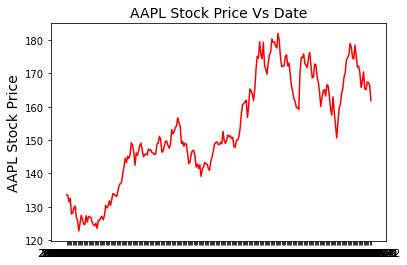

<Figure size 1080x216 with 0 Axes>

In [16]:
import matplotlib.pyplot as plt
plt.plot(stock_price['date'], stock_price['close_price'], color='red')
plt.title('AAPL Stock Price Vs Date', fontsize=14)
plt.ylabel('AAPL Stock Price', fontsize=14)
plt.figure(figsize=(15, 3))
plt.show()

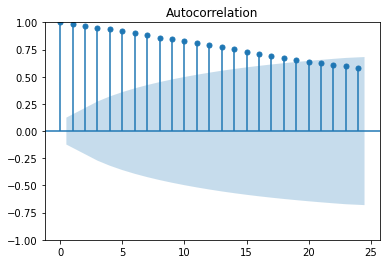

In [18]:
from statsmodels.graphics.tsaplots import plot_acf
data = stock_price[['date', 'close_price']].set_index(['date'])
# Calculate the ACF (via statsmodel)
plot_acf(data)
# Show the data as a plot (via matplotlib)
plt.show()

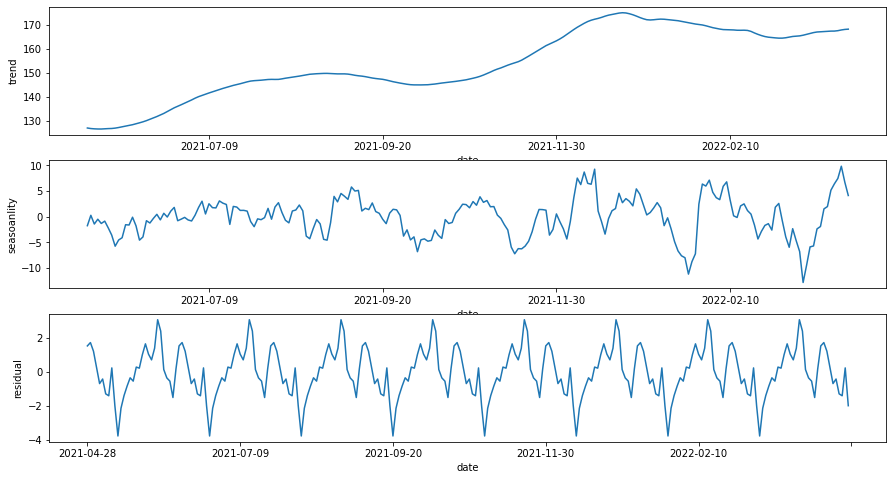

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose

res = seasonal_decompose(data, model = "additive",period = 30)

fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,8))
res.trend.plot(ax=ax1,ylabel = "trend")
res.resid.plot(ax=ax2,ylabel = "seasoanlity")
res.seasonal.plot(ax=ax3,ylabel = "residual")
plt.show()

In [24]:
! pip install pandas-ta

     |████████████████████████████████| 115 kB 2.0 MB/s eta 0:00:01
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218923 sha256=c4c06f4e456dbf372cc80acd31d3ed8e6ad225ffe1a28ea1dccb5633a720750f
  Stored in directory: /Users/mac/Library/Caches/pip/wheels/0b/81/f0/cca85757840e4616a2c6b9fe12569d97d324c27cac60724c58
Successfully built pandas-ta


In [25]:
import pandas_ta
stock_price.ta.ema(close='close_price', length=10, append=True)

1             NaN
2             NaN
3             NaN
4             NaN
5             NaN
          ...    
246    168.884711
247    168.614764
248    168.362988
249    168.009718
250    166.878860
Name: EMA_10, Length: 250, dtype: float64

In [27]:
# Drop the first n-rows
stock_price = stock_price.iloc[10:]
stock_price

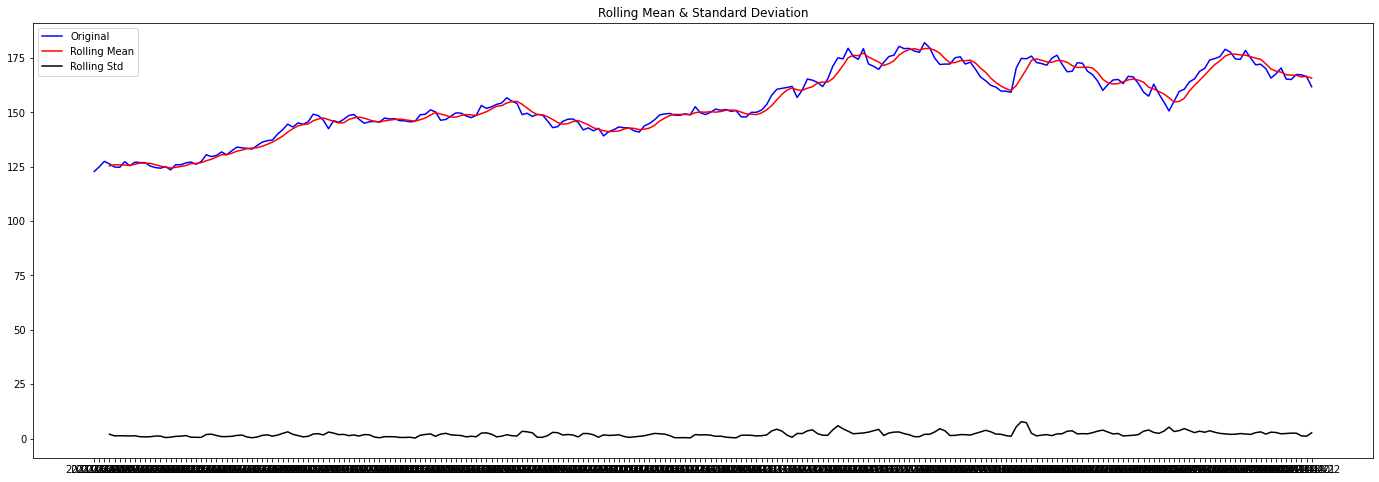

Results of Dickey-Fuller Test:
Test Statistic                  -1.811490
p-value                          0.374772
#Lags Used                       2.000000
Number of Observations Used    237.000000
Critical Value (1%)             -3.458247
Critical Value (5%)             -2.873814
Critical Value (10%)            -2.573311
dtype: float64


In [34]:
from statsmodels.tsa.stattools import adfuller
data_new = stock_price[['date', 'EMA_10']].set_index(['date'])
def test_stationarity(timeseries):
    
    # Calculate rolling mean and sd
    rolmean = timeseries.rolling(4).mean()
    rolstd = timeseries.rolling(4).std()

    # Plot the rolling stat
    plt.figure(figsize=(24, 8))   
    orig = plt.plot(timeseries, color='blue',label='Original') 
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std') 
    
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # ADF Test (stationarity test)
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used',
                                             'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
test_stationarity(data)

### Sentiment Analysis

In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
news

,Stock,Date,Time,News Headlines
0,AAPL,2022-05-01,09:27PM,Earnings Season Has Been Just One More Reason ...
1,AAPL,2022-05-01,09:26PM,Big Tech Cant Easily Fix the Stock Markets Woe...
2,AAPL,2022-05-01,08:55AM,Spotify Stock Sell-Off: The Truth Behind the H...
3,AAPL,2022-05-01,08:15AM,5G Stocks To Buy: How Next-Gen Cloud Will Crea...
4,AAPL,2022-05-01,05:30AM,Lockdowns and supply chain disruption to accel...
...,...,...,...,...
95,AAPL,2022-04-28,04:19PM,"US STOCKS-Wall Street ends sharply higher, lif..."
96,AAPL,2022-04-28,03:56PM,"Apple Could Fall From the Tree in Q3, Warns An..."
97,AAPL,2022-04-28,03:30PM,What Mark Zuckerberg Said That Calmed Investors
98,AAPL,2022-04-28,03:22PM,Stocks rally as investors shake off negative G...


In [14]:
import nltk
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/mac/nltk_data...


True

In [15]:
#from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
scores = news['News Headlines'].apply(analyzer.polarity_scores).tolist()
df_scores = pd.DataFrame(scores)
news = news.join(df_scores, rsuffix='_right')

In [20]:
score = news['compound'].tolist()